In [1]:
#import packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


In [2]:
data = pd.read_csv("movie_metadata.csv")
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
#Keep relevent columns from the table
data = data[['movie_imdb_link', 'imdb_score', 'movie_title', 'title_year', 'duration', 'language', 'country', 'genres', 'director_name', 'director_facebook_likes', 'movie_facebook_likes', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'aspect_ratio', 'facenumber_in_poster', 'plot_keywords','content_rating']]


Q1. What are the total number of movies reviewed by year

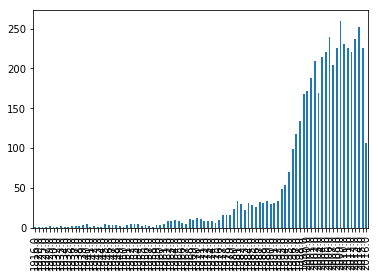

In [4]:
#Lets see the trend.
#check for missing values, and remove if any
len(data['movie_title'])
len(data['title_year'])
#below for Q2
#len(data['imdb_score'])

temp = data[['title_year', 'movie_title', 'imdb_score']]
temp = temp[temp.title_year.notnull()]
temp = temp[temp.movie_title.notnull()]

#solution to Q1 can be solved in two different ways, using sort_index() and groupby()
temp = temp[['title_year', 'movie_title']]
temp.title_year.value_counts().sort_index().plot(kind='bar')

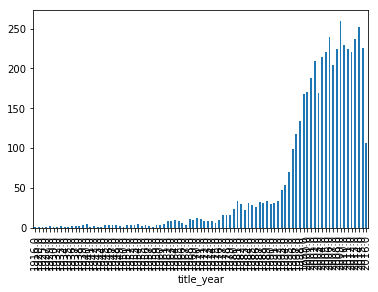

In [5]:
#another way
temp.groupby(temp.title_year).size().plot(kind='bar')
#need to figure out how to deal with axis markers

Q2. What is the average imdb rating by year

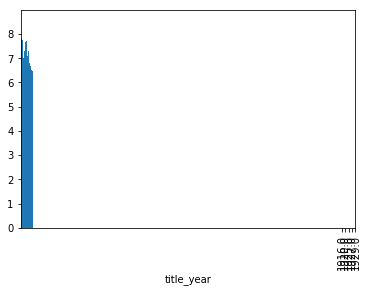

In [6]:

temp = data[['title_year', 'imdb_score']]
temp = temp[temp.title_year.notnull()]
temp = temp.groupby(temp.title_year).imdb_score.mean().plot(kind='bar')
temp.xaxis.set_ticks(np.arange(1920, 2016, 20))


In [ ]:
Q3. How do the score change for each type of content rating? (Are the content ratings tied to the imdb scores?)


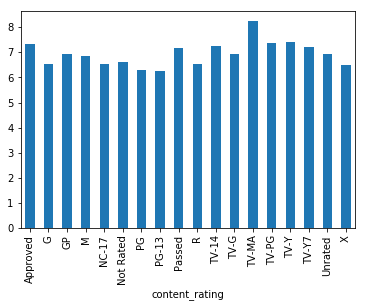

In [24]:
temp = data[['content_rating', 'imdb_score']]
temp.groupby(temp.content_rating).imdb_score.mean().plot(kind='bar')
plt.show()

In [ ]:
Q4. Which director has the highest IMDB average score? Display the top 10


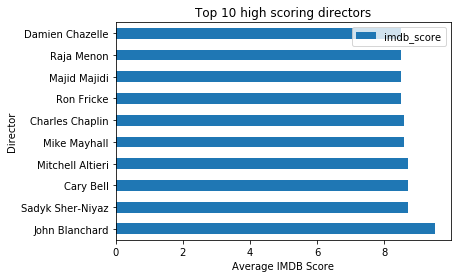

In [26]:
#len(data['director_name'])
temp = data[['director_name', 'imdb_score']]
t1 = temp.groupby(temp.director_name).mean().sort_values(by='imdb_score', ascending=[False])
t1 = t1.head(10).plot(kind='barh', title='Top 10 high scoring directors', legend=[True])
# set labels for both axes
t1 = t1.set( xlabel='Average IMDB Score', ylabel='Director')
plt.show()